In [3]:
library('ggplot2')
library('reshape2')
library('ggpubr')
library(glmnet)
library(doMC)
library(survival)
library(data.table)
library(mltools)
library(CoxBoost)
library(randomForestSRC)
library(CoxHD)
library(Hmisc)
library(gridExtra)
library("survminer")
library(dplyr)

source("../../../../src/tools.R")
options(repr.plot.res        = 100, # set a medium-definition resolution for the jupyter notebooks plots (DPI)
        repr.matrix.max.rows = 250, # set the maximum number of rows displayed
        repr.matrix.max.cols = 250) # set the maximum number of columns displayed

In [5]:
options(warn = -1)
#SVM <- read.table("../Prognosis_results/SVM.csv",sep=',',header=T)[1:10,]
#SVM_reduced <- read.table("../Bootstrap_coef/SVM_reduced.csv",sep=',',header=T)

myplots <- list() 
i <- 1
for (l in list.files('../Bootstrap_coef/')){
    if (grepl("_reduced.tsv",l)){
        df <- NULL
        #try(tmp1 <- cbind(read.table(paste('../Bootstrap_coef/',l,sep=""))[,c(1,3,5,7,9,11:14)],SVM_optimized=SVM_reduced[,sub("_reduced.tsv","",l)]))
        try(tmp1 <- read.table(paste('../Bootstrap_coef/',l,sep=""))[,c(1,3,5,7,9,11:14)])
        try(tmp1$feature <- "reduced")
        try(tmp1$model <- sub("_reduced.tsv","",l))
        #try(tmp2 <- cbind(read.table(paste("../Prognosis_results/",sub("_reduced","",l),sep=""))[1:10,],SVM_optimized=SVM[,sub("_reduced.tsv","",l)]))
        try(tmp2 <- read.table(paste("../Prognosis_results/",sub("_reduced","",l),sep=""))[1:10,])      
        try(tmp2$feature <- "full")
        try(tmp2$model <- sub("_reduced.tsv","",l))
        try(df <- rbind(tmp1,tmp2))
        try(df <- melt(df,id=c('model','feature')))
        try(myplots[[sub("_reduced.tsv","",l)]] <- ggplot(df,aes(x=variable,y=value)) + geom_boxplot(aes(fill = feature), notch=F) + theme(strip.text = element_text(size=35),legend.position="top",axis.text.x = element_text(size=20,angle = 35, hjust = 0.8,vjust=0.8),
              axis.text.y = element_text(size=20),axis.title.x=element_text(size=30),axis.title.y=element_text(size=30),legend.title=element_text(size=30),legend.text=element_text(size=40)) +
        ylab("C-Index") + xlab("Algorithms Comparison") + facet_wrap( ~ model, ncol=2) +scale_fill_manual(values=c("#5C5C5C","#EE9937")))
        try(i <- i+1)
    }
}
#c(1,2,8,10,11,12,20,23,25,26,30,32,35,36,37,38,39,40,41,43)
set_notebook_plot_size(70,120)
#grid.arrange(grobs=myplots[c(1,2,8,10,19,26,30,32,36,37)],nrow=5,ncol2)
grid.arrange(grobs=myplots,nrow=11,ncol=4)

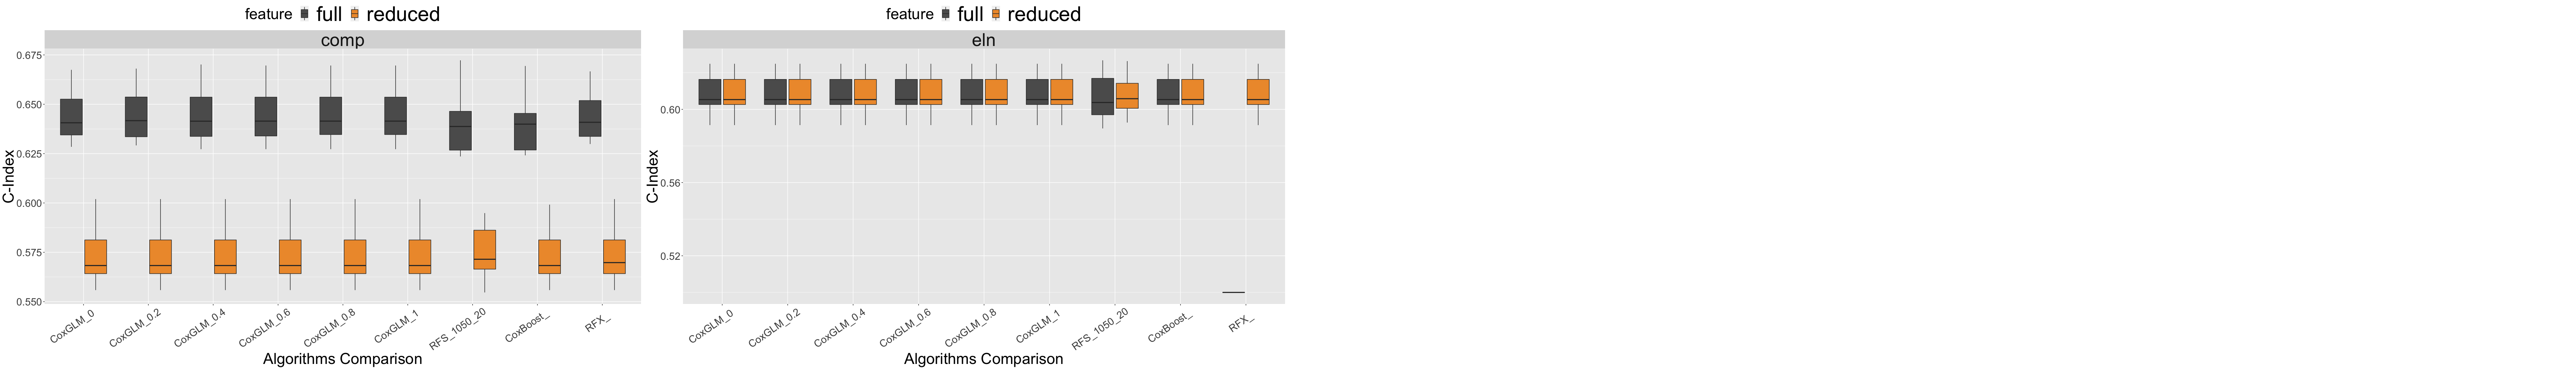

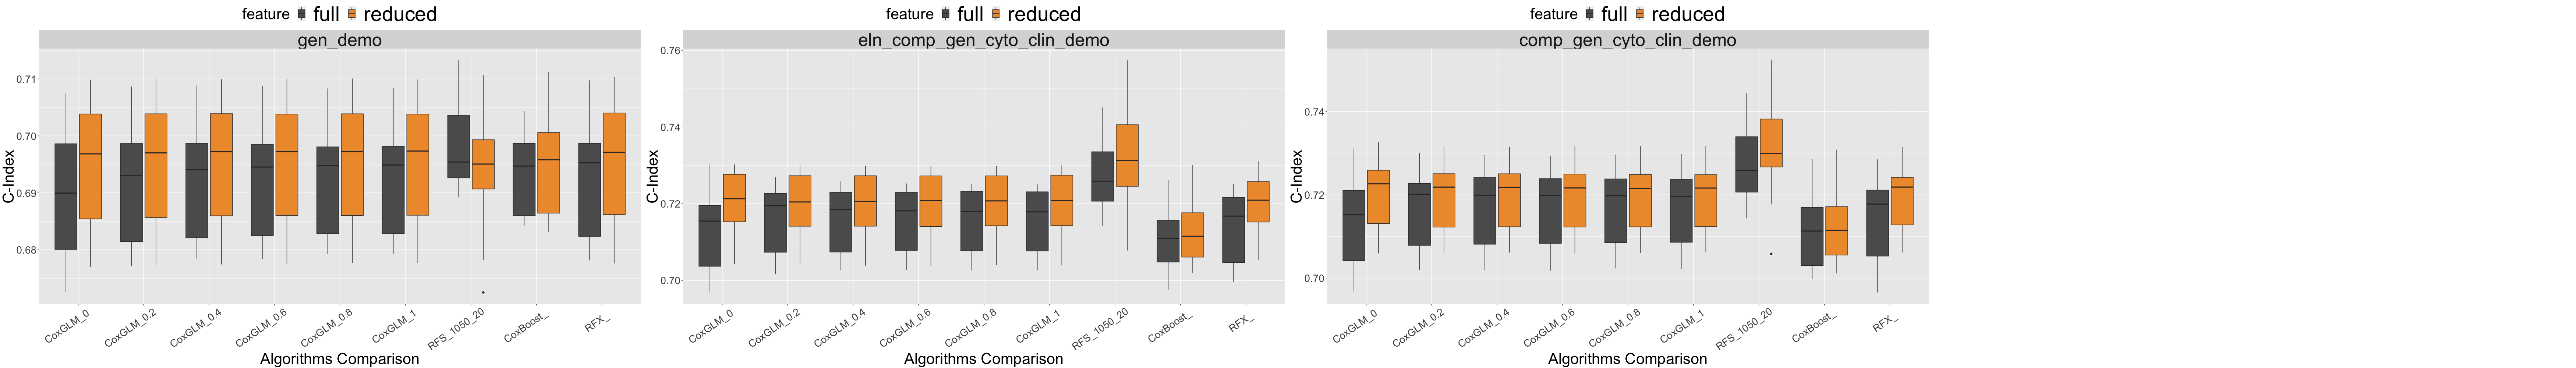

In [25]:
set_notebook_plot_size(70,10)
grid.arrange(grobs=myplots[c("comp","eln")],nrow=1,ncol=4)
grid.arrange(grobs=myplots[c("gen_demo","eln_comp_gen_cyto_clin_demo","comp_gen_cyto_clin_demo")],nrow=1,ncol=4)